In [ ]:
!pip install karateclub

Number of nodes (club-members) 34


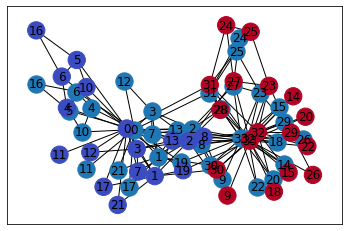

In [3]:
" Workshop on DeepWalk Algorithm using Karate Club"
import networkx as nx
from karateclub import DeepWalk 
from karateclub import Node2Vec
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


G = nx.karate_club_graph() # load the Zachary's karate club graph
print('Number of nodes (club-members)', len(G.nodes))
nx.draw_networkx(G)

" plot the graph with labels"
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'Officer' or 'Mr.Hi'
    
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')


In [4]:
" Perform node embedding using Node2Vec "
N2vec_model = Node2Vec(walk_number=10, walk_length=80,p=0.9 ,q=0.1,dimensions=124)
N2vec_model.fit(G)
N2Vec_embedding = N2vec_model.get_embedding()
print('Embedding array shape (nodes x features):',N2Vec_embedding.shape )


Embedding array shape (nodes x features): (34, 124)


Low dimensional embedding representaiton (nodes x 2): (34, 2)
Node2Vec AUC: 1.0


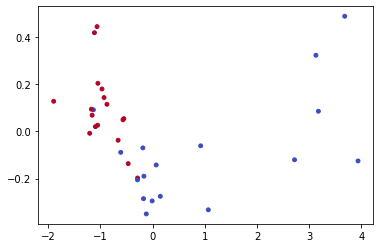

In [5]:
" Low dimensional plot of the neodes x features"
lowdimension_n2vembedding = PCA_model.fit_transform(N2Vec_embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_n2vembedding.shape)
plt.scatter(lowdimension_n2vembedding[:,0],lowdimension_n2vembedding[:,1],c=labels,
            s=15,cmap='coolwarm')



nx_train,nx_test,ny_train,ny_test = train_test_split(N2Vec_embedding, labels, test_size=0.3, random_state=42)
nML_model = LogisticRegression(random_state=0).fit(nx_train,ny_train)
ny_predict = nML_model.predict(nx_test)
nML_acc = roc_auc_score(ny_test,ny_predict)
print('Node2Vec AUC:',nML_acc)